In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
import warnings
warnings.filterwarnings( "ignore")

In [2]:
# loading the data

car_df=pd.read_csv('CarFeatures.csv')

# Q1. Perform EDA on the given dataset.


In [3]:
car_df.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


In [4]:
# checking the shape

car_df.shape

(25, 18)

In [5]:
#viewing the columns

car_df.columns

Index(['Make', 'Fuel Type', 'Aspiration', 'Number of Doors', 'Body Style',
       'Drive Wheels', 'Engine Location', 'Number of Cylinders', 'Wheel Base',
       'Length', 'Width', 'Height', 'Curb Weight', 'Engine Size', 'Horsepower',
       'City MPG', 'Highway MPG', 'Price'],
      dtype='object')

Data has 18 features and 25 observations.

In [6]:
#seeing if there are any duplicates

car_df.duplicated().sum()

0

Hence there are no repeated observtion.

In [7]:
# more information about the dataset

car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Make                 25 non-null     object 
 1   Fuel Type            25 non-null     object 
 2   Aspiration           25 non-null     object 
 3   Number of Doors      25 non-null     object 
 4   Body Style           25 non-null     object 
 5   Drive Wheels         25 non-null     object 
 6   Engine Location      25 non-null     object 
 7   Number of Cylinders  25 non-null     object 
 8   Wheel Base           25 non-null     float64
 9   Length               25 non-null     float64
 10  Width                25 non-null     float64
 11  Height               25 non-null     float64
 12  Curb Weight          25 non-null     int64  
 13  Engine Size          25 non-null     int64  
 14  Horsepower           25 non-null     int64  
 15  City MPG             25 non-null     int64

There are 8 categorical variables and 10 numerical variables.

None of the variables has null values.

There are no null values.

In [8]:
# separating the numeric and categoric variable


car_df_num = car_df.select_dtypes(['float64','int64']) 
car_df_cat = car_df.select_dtypes(['object'])

**Univariate analysis**

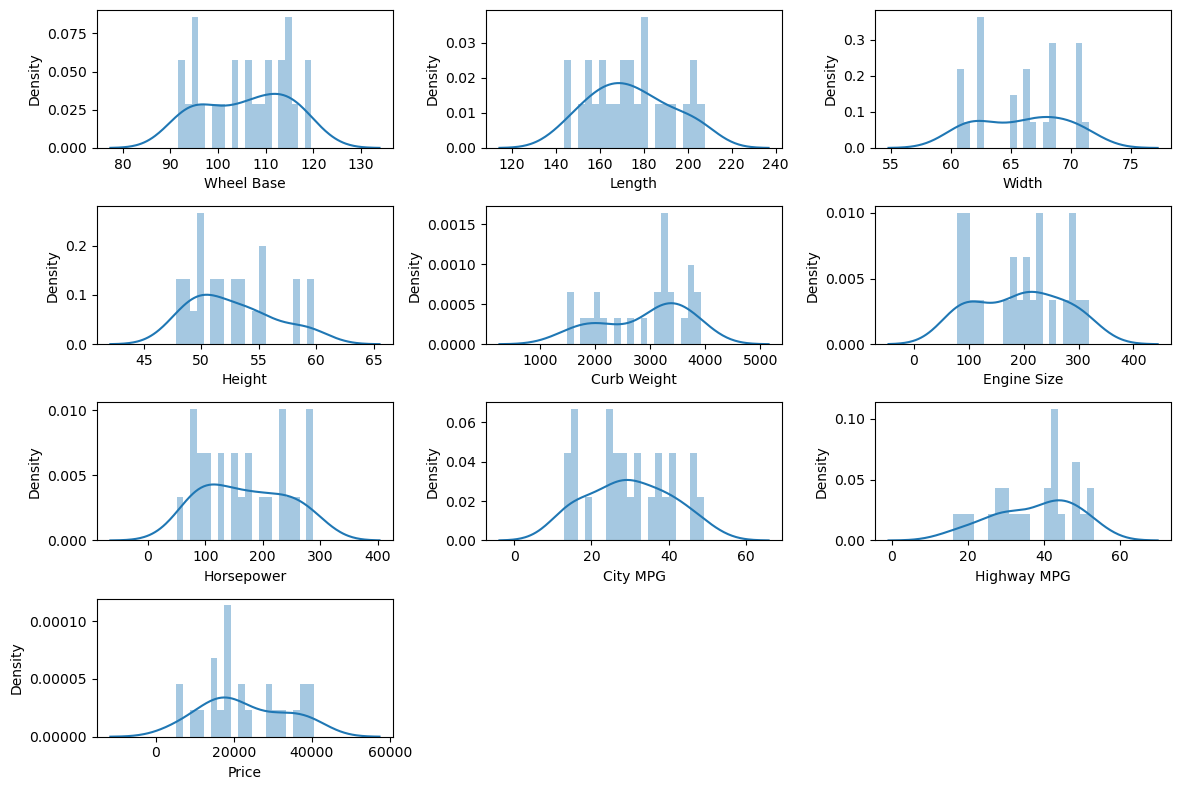

In [9]:
# for numerical values

plt.figure(figsize = (12,8))
feature_list = car_df_num.columns

for i in range(len(feature_list)):
  plt.subplot(4, 3, i + 1)
  sns.distplot(car_df_num[feature_list[i]], kde=True, bins =20);
  plt.tight_layout()

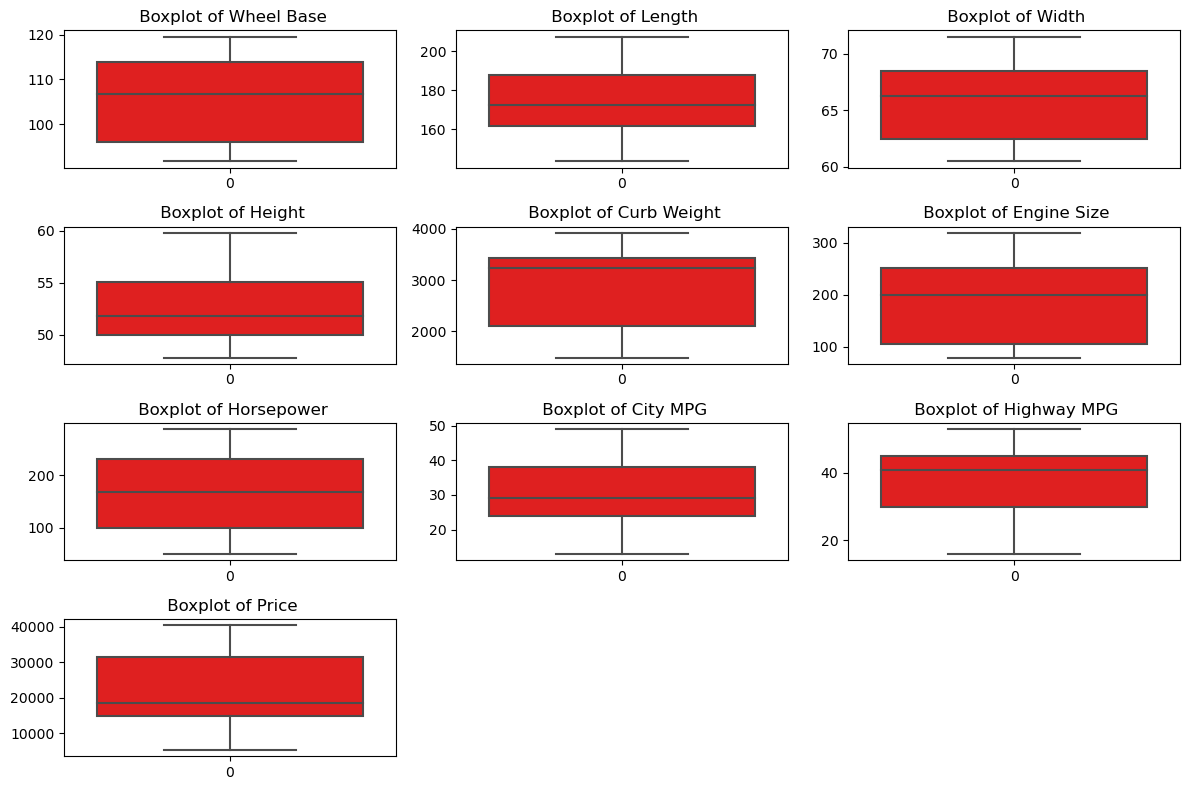

In [10]:
# checking if any outliers are present 

plt.figure(figsize = (12,8))
feature_list = car_df_num.columns

for i in range(len(feature_list)):
  plt.subplot(4, 3, i + 1)
  sns.boxplot(car_df_num[feature_list[i]],color='r');
  plt.title(' Boxplot of {}'.format(feature_list[i]))
  plt.tight_layout()

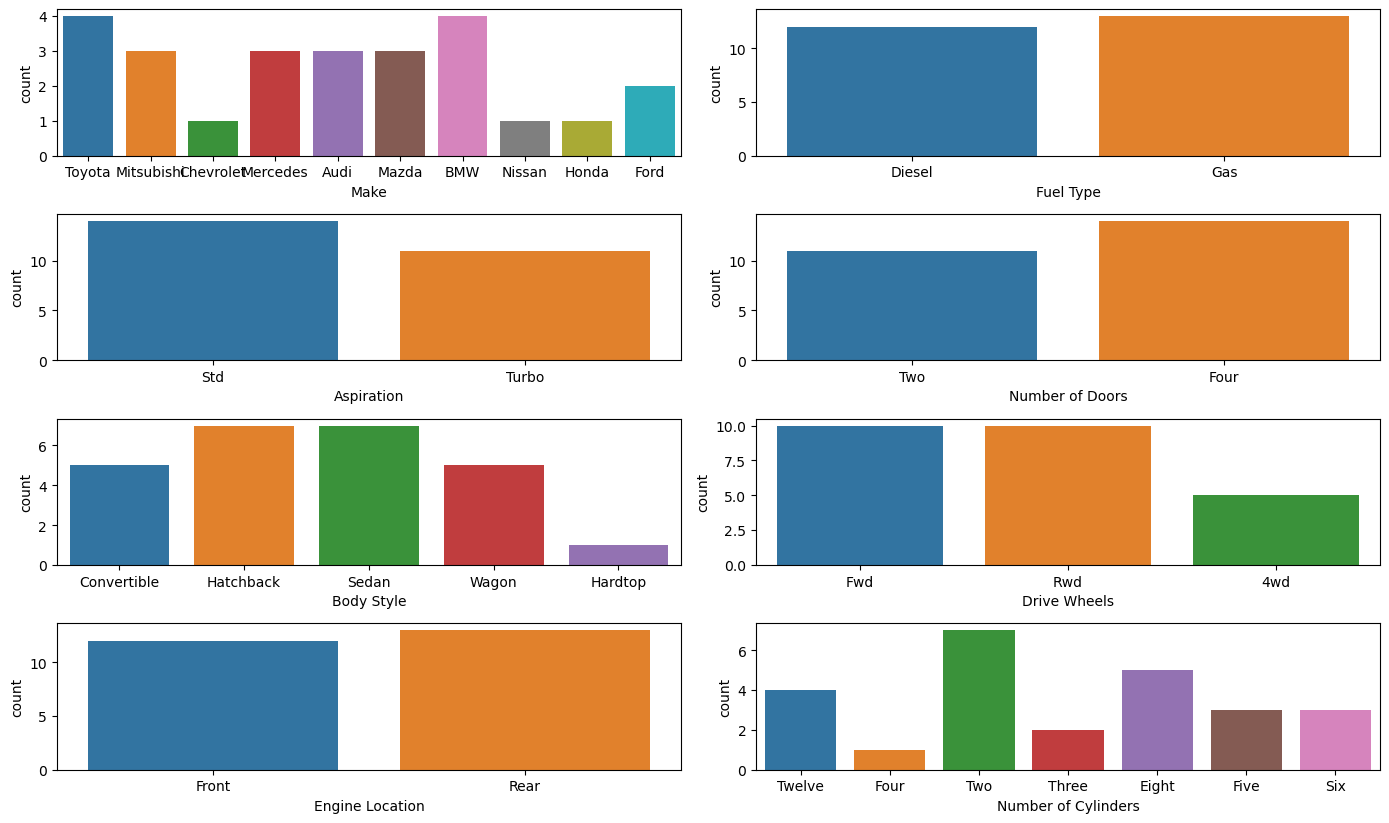

In [11]:
# for categorical values

plt.figure(figsize = (14,12))
feature_list = car_df_cat.columns
for i in range(len(feature_list)):
    plt.subplot(6, 2, i + 1)
    sns.countplot(x = car_df_cat[feature_list[i]], data = car_df_cat)
    plt.tight_layout()

**Bivariate analysis**

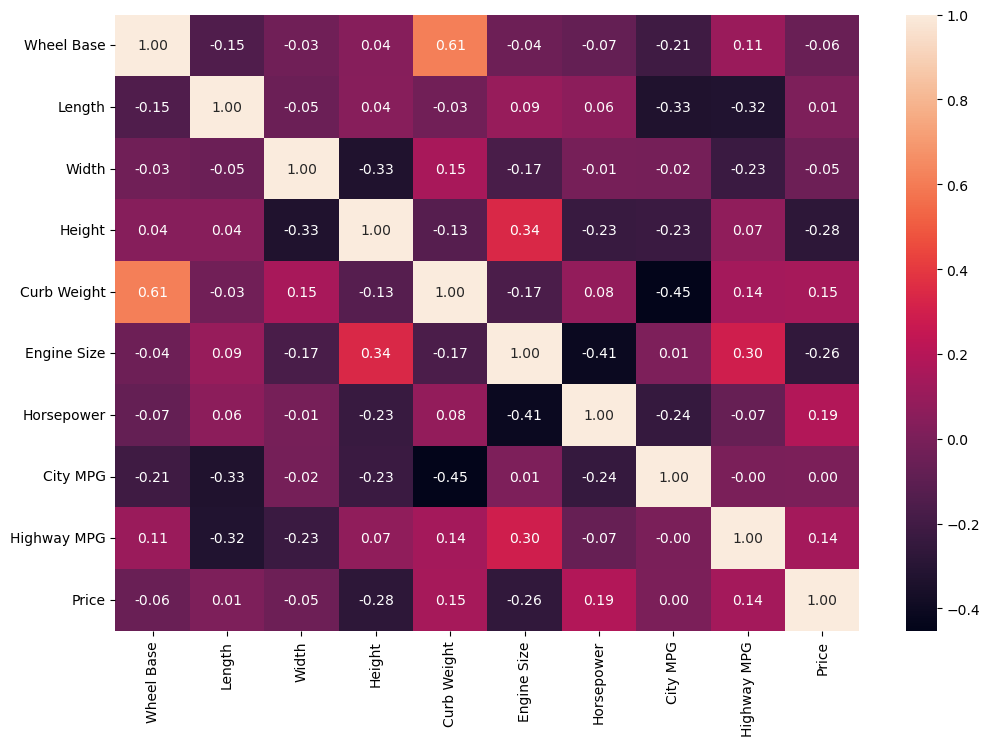

In [12]:
# checking correlation between variables

corr = car_df.corr(method='pearson')

fig = plt.subplots(figsize=(12,8))
sns.heatmap(car_df.corr(), annot=True,fmt='.2f')
plt.show()

Correlation values near to 1 or -1 are highly positively correlated and highly negatively correlated respectively. Correlation values near to 0 are not correlated to each other.

<Figure size 1200x800 with 0 Axes>

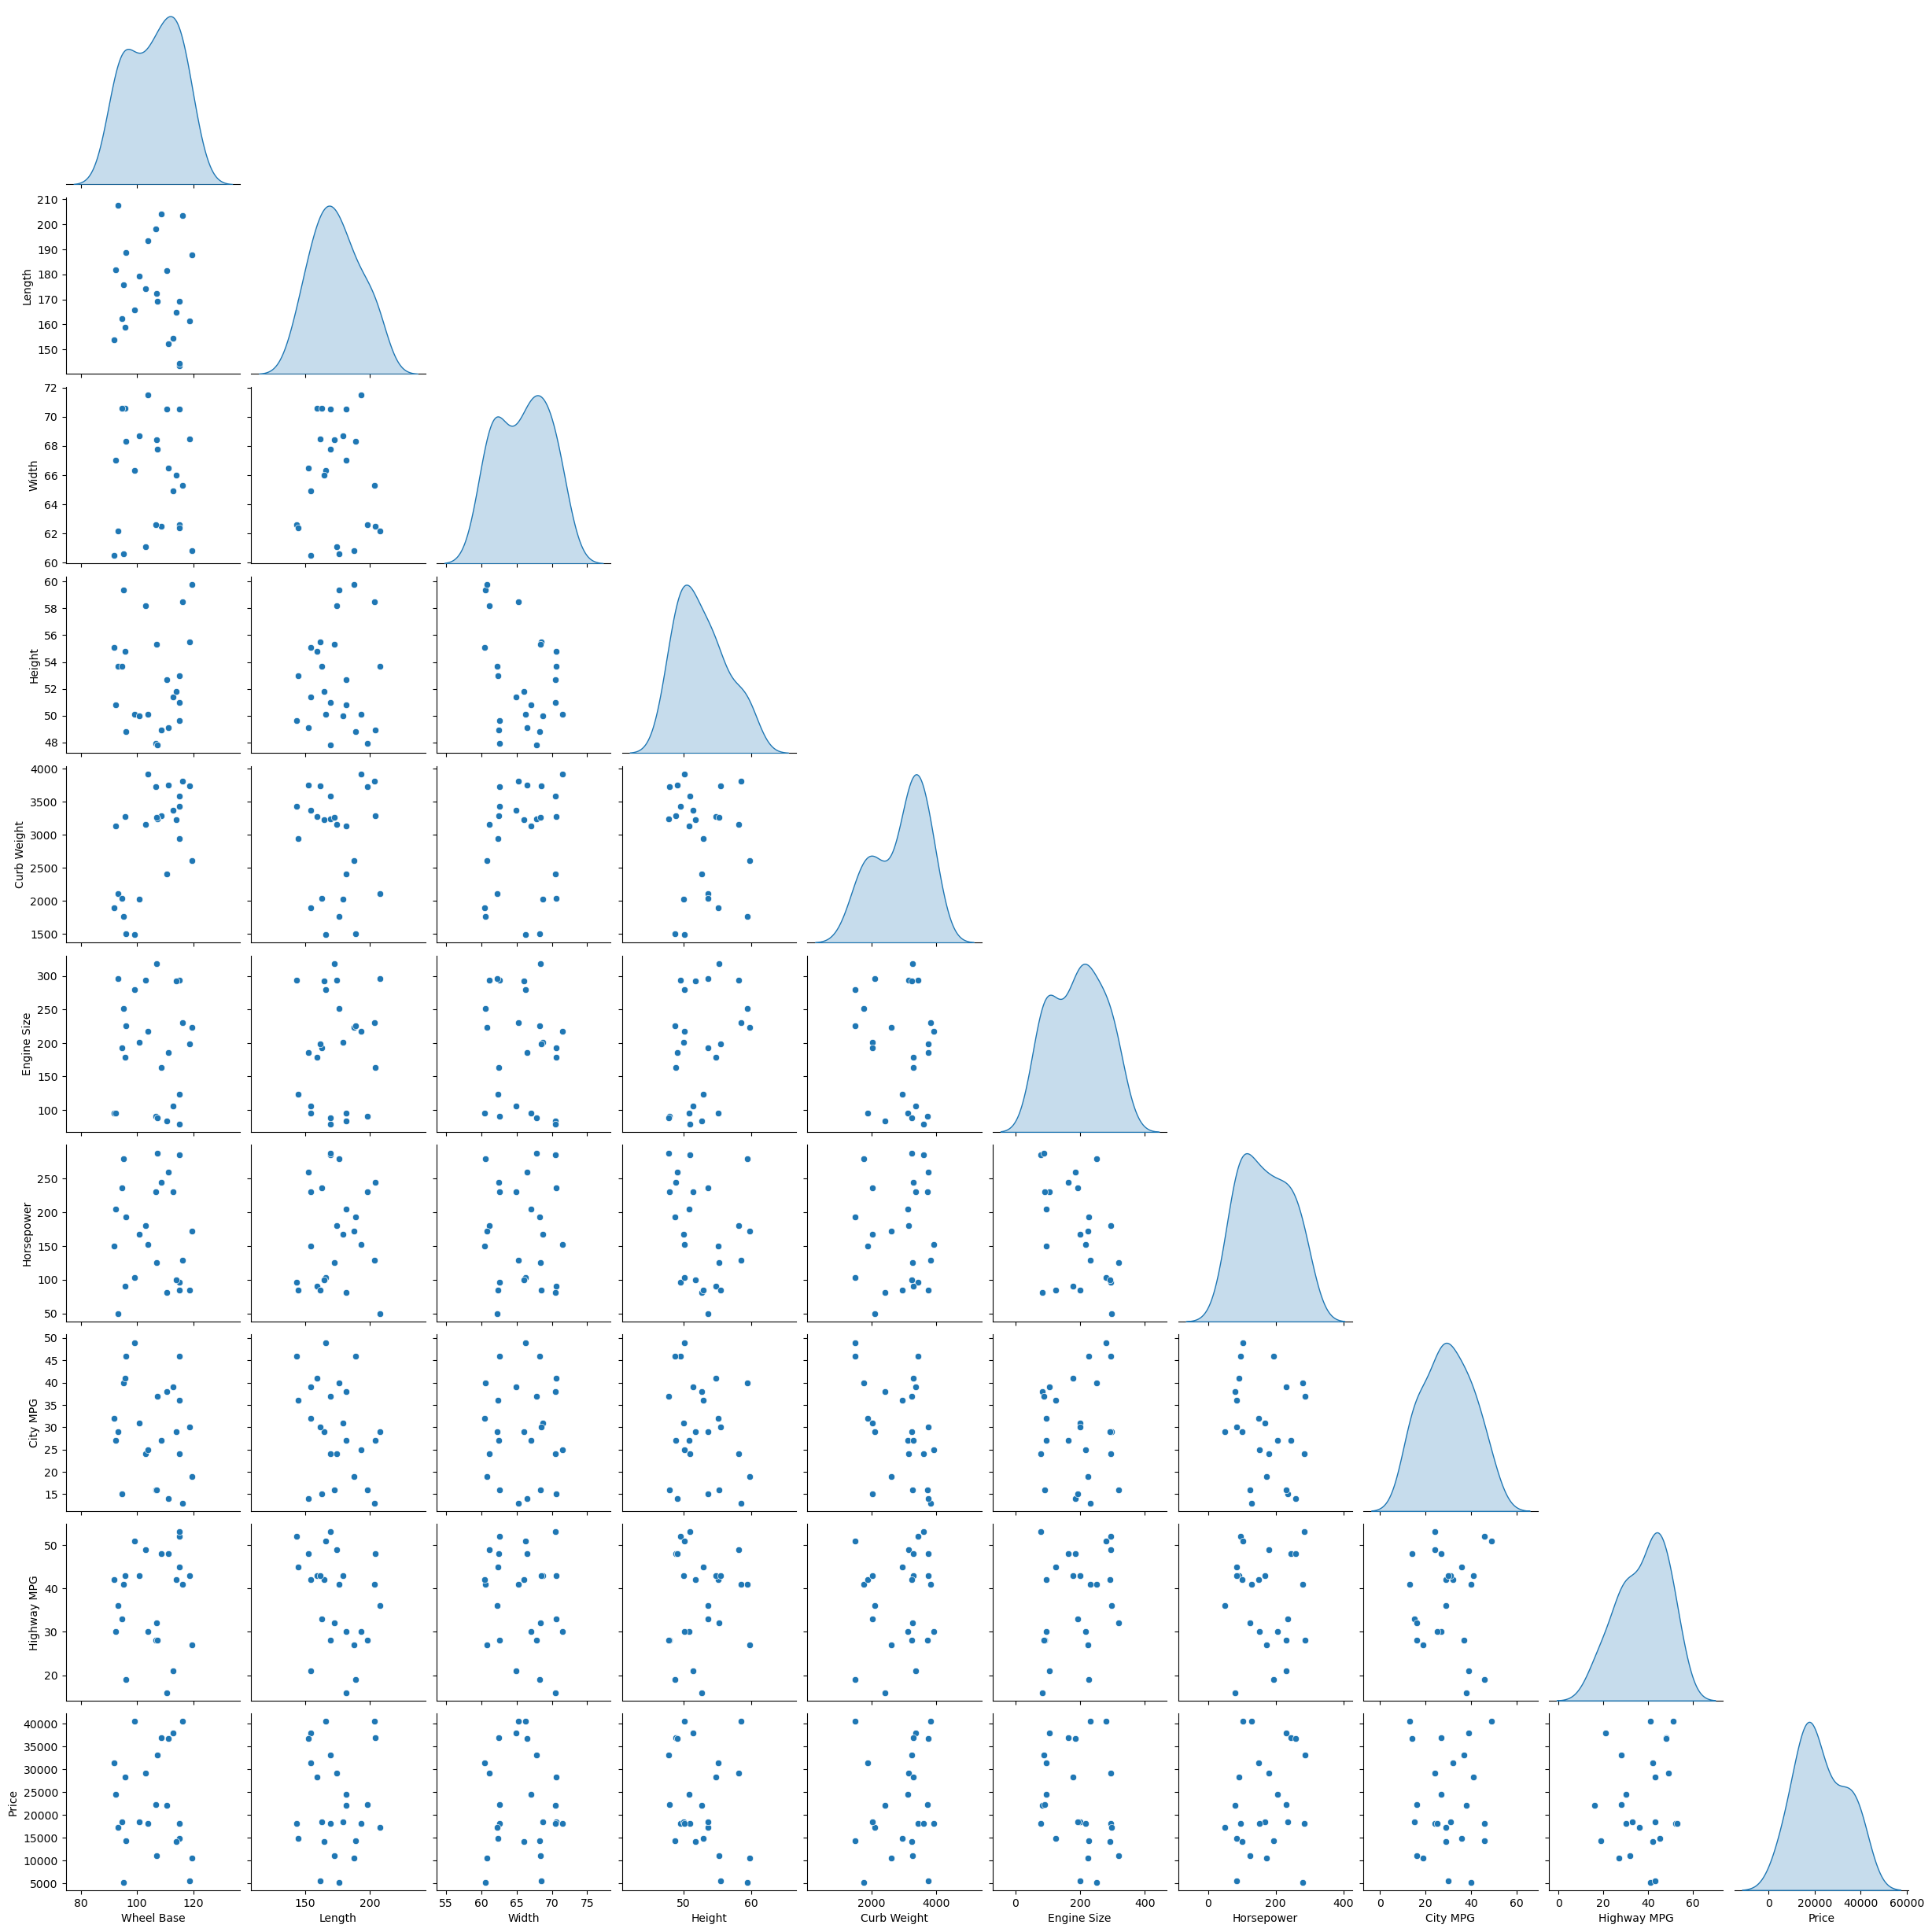

In [13]:
plt.figure(figsize = (12,8))
sns.pairplot(car_df,diag_kind='kde',corner=True);
plt.show()

1. Muticollinearity is an important issue which can harm the model.

2. Heatmap and pairplot are good ways of identifying this relationship between the variables.


# Q2.Summarize the data using descriptive statistics.

In [14]:
#getting more insights about the numerical variables


car_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Wheel Base,25.0,105.736,9.046403,91.7,96.0,106.8,113.9,119.6
Length,25.0,173.928,18.508523,143.4,161.4,172.4,187.8,207.6
Width,25.0,65.868,3.632804,60.5,62.5,66.3,68.5,71.5
Height,25.0,52.680,3.623534,47.8,50.0,51.8,55.1,59.8
Curb Weight,25.0,2907.720,777.650924,1488.0,2108.0,3231.0,3433.0,3922.0
Engine Size,25.0,192.360,79.342548,79.0,106.0,199.0,252.0,319.0
Horsepower,25.0,168.760,73.189981,50.0,100.0,168.0,231.0,288.0
City MPG,25.0,29.720,10.659581,13.0,24.0,29.0,38.0,49.0
Highway MPG,25.0,37.640,10.664896,16.0,30.0,41.0,45.0,53.0
Price,25.0,22684.920,10684.205266,5272.0,14838.0,18524.0,31393.0,40466.0


1.Wheel base : min is 91.7 and max is 119.6

2.Length : Min is 143.4 and max is 207.6

3.Width : Min is 60.5 and max is 71.5

4.Height: Min is 47.8 and max is 59.8

5.Curb weight :Min is 1488 and max is 3922

6.Engine size : Min is 79.0 and max is 319

7.Horse power: Min is 50.0 and max is 288

8.City MPG : Min is 13 and max is 49

9.Highway MPG: Min is 16 and max is 53

10.Price: Min is 5270 and max is 40466

In [15]:
#getting more insights about the categorical variables


car_df_cat.describe().T

,count,unique,top,freq
Make,25,10,Toyota,4
Fuel Type,25,2,Gas,13
Aspiration,25,2,Std,14
Number of Doors,25,2,Four,14
Body Style,25,5,Hatchback,7
Drive Wheels,25,3,Fwd,10
Engine Location,25,2,Rear,13
Number of Cylinders,25,7,Two,7


There are total of 10 Makes of the Car.

# Q3. Identify the costliest car and the cheapest car by average price.


In [16]:
temp_df = car_df.groupby(['Make'],
                         as_index = False).mean().sort_values(by='Price',ascending = False)
temp_df.head()

,Make,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
2,Chevrolet,116.200000,203.500000,65.300000,58.500000,3815.000000,231.000000,129.000000,13.000000,41.000000,40450.000000
7,Mitsubishi,105.033333,163.233333,65.300000,53.066667,2554.333333,95.000000,153.666667,36.333333,26.333333,30456.666667
0,Audi,109.800000,165.166667,66.033333,52.766667,3499.000000,186.333333,241.666667,20.666667,50.000000,27944.333333
9,Toyota,100.925000,181.300000,64.525000,52.100000,2140.500000,224.000000,198.750000,36.750000,45.750000,25292.500000
6,Mercedes,105.800000,166.833333,65.266667,50.766667,3480.666667,188.000000,139.333333,34.333333,41.000000,22832.000000


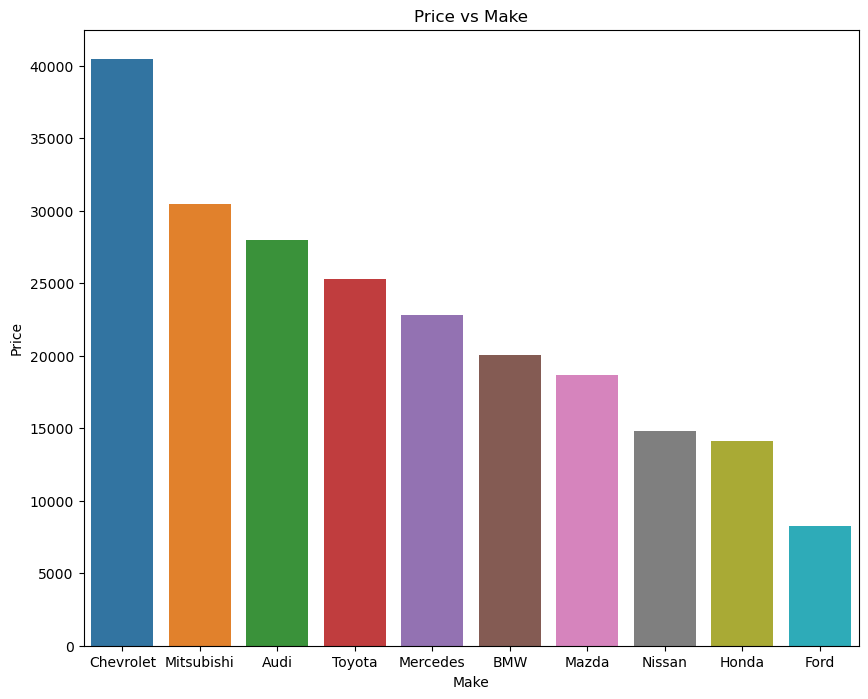

In [17]:
plt.figure(figsize=(10,8))

sns.barplot(data=temp_df, x="Make", y="Price")
plt.title("Price vs Make");

By average price the costliest car is ' Chevrolet' and the cheapest car is 'Ford'.


# Q4.Which fuel type car has the highest average price?


In [18]:
temp_df = car_df.groupby(['Fuel Type'],
                         as_index = False).mean().sort_values(by='Price',ascending = False)
temp_df

,Fuel Type,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
1,Gas,109.800000,171.353846,65.653846,51.892308,3199.692308,189.615385,151.923077,29.230769,38.230769,24979.230769
0,Diesel,101.333333,176.716667,66.100000,53.533333,2591.416667,195.333333,187.000000,30.250000,37.000000,20199.416667


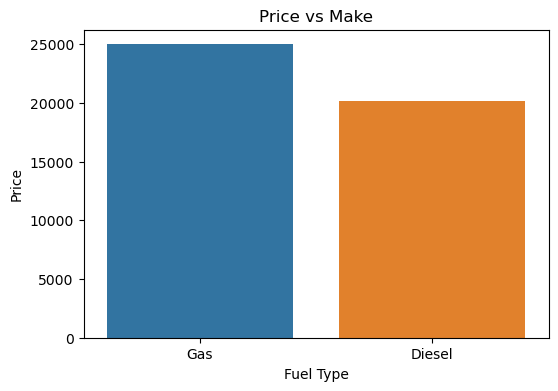

In [19]:
plt.figure(figsize=(6,4))

sns.barplot(data=temp_df, x="Fuel Type", y="Price")
plt.title("Price vs Make");

Gas type car has higher price than diesel car.

# Q5. For the given dataset, construct the following contingency table (take make as row variable)


In [20]:
data_crosstab = pd.crosstab(car_df['Make'],car_df['Fuel Type'], margins = False)
data_crosstab

Fuel Type,Diesel,Gas
Make,,
Audi,2,1
BMW,4,0
Chevrolet,0,1
Ford,0,2
Honda,0,1
Mazda,2,1
Mercedes,1,2
Mitsubishi,1,2
Nissan,0,1


In [21]:
data_crosstab = pd.crosstab(car_df['Make'], car_df['Body Style'], margins = False)
data_crosstab

Body Style,Convertible,Hardtop,Hatchback,Sedan,Wagon
Make,,,,,
Audi,1,0,0,1,1
BMW,1,1,1,0,1
Chevrolet,0,0,1,0,0
Ford,0,0,0,0,2
Honda,0,0,0,1,0
Mazda,0,0,2,1,0
Mercedes,0,0,1,2,0
Mitsubishi,1,0,1,0,1
Nissan,0,0,0,1,0


# Q6. What is the probability that a randomly selected car will be a BMW?



In [22]:
data1 = car_df['Make'].value_counts()['BMW']
data2 = car_df['Make'].value_counts().sum()
probability = data1 / data2
print("Probability that a randomly selected car will be a BMW is : ", probability)



Probability that a randomly selected car will be a BMW is :  0.16


# Q7.What is the probability that a randomly selected car will be an Audi?


In [23]:
data1 = car_df['Make'].value_counts()['Audi']
data2 = car_df['Make'].value_counts().sum()
probability = data1 / data2
print("Probability that a randomly selected car will be a Audi is : ", probability)


Probability that a randomly selected car will be a Audi is :  0.12


# Q8.Form the null and alternate hypothesis to test whether the price of Gas cars is significantly different from that of Diesel  Cars

**Null Hypotheis** : states that there is no difference between the average price of Gas and Diesel Cars.

Alternative Hypothesis :  states that there is a difference between the average price of Gas and Diesel Cars.

**Ho: μ(Gas) -  μ(Diesel) = 0**

**H1: μ(Gas) -  μ(Diesel) != 0**

# Q9. Find the p-value. At 0.05 level of significance, is the price of gas cars significantly different from that of diesel cars?


We don't know the variance of the population. A common strategy to assess hypothesis is to conduct a t test. A t test can tell whether two groups have the same mean.


Level of significance α = 0.05

It is a two sample t-test  as there are two variables 'Fuel Type' and 'Price'

In [24]:
import scipy.stats as stats

group1 = car_df[car_df['Fuel Type']=='Gas']
group2 = car_df[car_df['Fuel Type']=='Diesel']


t_stat, p_value = stats.ttest_ind(group1['Price'], group2['Price'])
print("T-statistic value: ", t_stat)
print("P-Value: ", p_value);

if(p_value < 0.05):
  print("Reject the null hypothesis")
else:
  print("Failed to reject the null hypothesis")


T-statistic value:  1.1236308256408953
P-Value:  0.27276131360711153
Failed to reject the null hypothesis


Since p-value > α, hence we failed to reject the null hypothesis. Hence statistically there is no significant difference between the average price of Gas and Diesel Cars.


# Q10. Suppose you randomly select a car from this dataset. What is the probability that it is a 'Luxury Car' ?
( consider BMW, Mercedes and Audi as a luxary car under the column Make )

In [9]:
car_df['Make'].value_counts()

Toyota        4
BMW           4
Mitsubishi    3
Mercedes      3
Audi          3
Mazda         3
Ford          2
Chevrolet     1
Nissan        1
Honda         1
Name: Make, dtype: int64

In [20]:
total=car_df['Make'].value_counts().sum()

selected=car_df[(car_df['Make']=='BMW') | (car_df['Make']=='Mercedes') | (car_df['Make']=='Audi')]

selected_total=selected.shape[0]

In [24]:
req_probability=selected_total/total
print(f'Probability of getting a luxary car is {req_probability}')

Probability of getting a luxary car is 0.4


# Q11. You want to select a subset of three unique cars from the dataset to participate in a race. How many different ways can you arrange the cars in the race, considering their 'Make' as the criteria?

In [28]:
car_df.head()

,Make,Fuel Type,Aspiration,Number of Doors,Body Style,Drive Wheels,Engine Location,Number of Cylinders,Wheel Base,Length,Width,Height,Curb Weight,Engine Size,Horsepower,City MPG,Highway MPG,Price
0,Toyota,Diesel,Std,Two,Convertible,Fwd,Front,Twelve,95.1,175.9,60.6,59.4,1758,252,279,40,41,5272
1,Mitsubishi,Diesel,Std,Four,Convertible,Fwd,Rear,Four,91.7,153.9,60.5,55.1,1887,95,150,32,42,31393
2,Chevrolet,Gas,Turbo,Four,Hatchback,Rwd,Front,Two,116.2,203.5,65.3,58.5,3815,231,129,13,41,40450
3,Mitsubishi,Gas,Turbo,Four,Hatchback,Fwd,Front,Three,112.8,154.3,64.9,51.4,3367,106,230,39,21,37881
4,Mercedes,Gas,Std,Four,Sedan,Rwd,Rear,Two,115.1,143.4,62.6,49.6,3433,294,96,46,52,18087


In [38]:
import itertools

car_makes=list(car_df['Make'].unique())

num_cars_to_select = 3

permutations = list(itertools.permutations(car_makes, num_cars_to_select))

num_arrangements = len(permutations)

print(f'Number of different ways to arrange 3 cars: { num_arrangements}')


Number of different ways to arrange 3 cars: 720


# Q12. If you randomly pick a car with 8 cylinders, what is the probability that BMW?

In [48]:
combined=pd.crosstab(index=car_df['Make'],columns=car_df['Number of Cylinders'],margins=True)
combined

Number of Cylinders,Eight,Five,Four,Six,Three,Twelve,Two,All
Make,,,,,,,,
Audi,1,1,0,1,0,0,0,3
BMW,2,0,0,0,0,1,1,4
Chevrolet,0,0,0,0,0,0,1,1
Ford,0,0,0,1,0,0,1,2
Honda,0,0,0,0,1,0,0,1
Mazda,1,1,0,0,0,0,1,3
Mercedes,0,1,0,1,0,0,1,3
Mitsubishi,0,0,1,0,1,1,0,3
Nissan,0,0,0,0,0,0,1,1


In [54]:
req_prob= combined.iloc[1,0]/combined.iloc[10,0]

print(f'probability of it being a bMW is {req_prob}')

probability of it being a bMW is 0.4


# Q13. You are conducting a random survey by selecting 7 cars from the dataset. Calculate the probability that exactly 3 out of the 7 selected cars have 'Turbo' aspiration.

In [63]:
car_df['Aspiration'].value_counts()

Std      14
Turbo    11
Name: Aspiration, dtype: int64

In [74]:
turbo_num=car_df[car_df['Aspiration']=='Turbo'].shape[0]
total=car_df.shape[0]

p_turbo=turbo_num/total
p_turbo

0.44

In [79]:
import scipy.stats as stats

k=3
n=7

probability_turbo = stats.binom.pmf(k, n, p_turbo)

print(f'Thus the probability that exactly 3 out of 7 selected cars have turbo aspiration is',round(probability_turbo,2))

Thus the probability that exactly 3 out of 7 selected cars have turbo aspiration is 0.29
